### 곡선 형태일때 심심해서 그냥 비교해봄.

In [1]:
import keras

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1
    return (x,y)

def sample(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1 + np.random.randn(x.size)*0.5
    return (x,y)

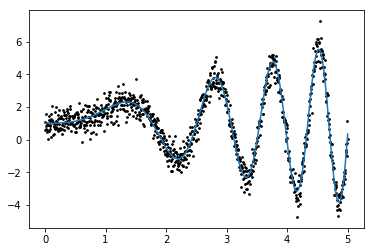

In [4]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
X_orgin, y_orgin = sample(1000)
plt.scatter(X_orgin, y_orgin, s=3, c="black")
plt.show()

In [5]:
X = X_orgin.copy()
y = y_orgin.copy()

In [6]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

In [8]:
X_poly = PolynomialFeatures(degree=23).fit_transform(X)
X_poly.shape[1], X.shape[1]

(24, 1)

In [9]:
linear = LinearRegression()
linear.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
linear.score(X_poly, y)

0.9400621263569304

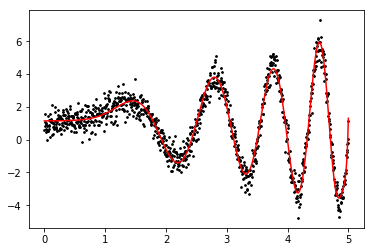

In [11]:
plt.scatter(X, y, s=3, c="black")
plt.plot(X.flatten(),  linear.predict(X_poly).flatten(), c='r')

In [12]:
X_orgin.shape

(1000,)

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, input_shape=(1,), activation='relu'))
model.add(keras.layers.Dense(40, activation='relu'))
model.add(keras.layers.Dense(30, activation='relu'))
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(40, activation='relu'))
# model.add(keras.layers.Dense(40, activation='relu'))
# model.add(keras.layers.Dense(20, activation='relu'))
# model.add(keras.layers.Dense(10, activation='relu'))
# model.add(keras.layers.Dense(20, activation='relu'))
# model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1))

In [14]:
model.compile('sgd', loss='mse', metrics=['accuracy'])
# model.compile('adam', loss='mse', metrics=['accuracy'])

In [15]:
history = model.fit(X_orgin, y, batch_size=100, epochs=500, verbose=0, validation_split=0.2)

In [16]:
i = np.array([0])
model.predict(i)

array([[0.88463265]], dtype=float32)

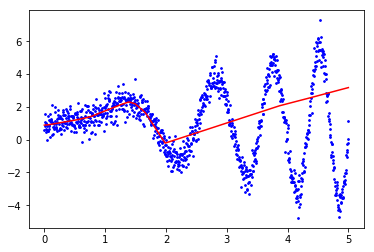

In [17]:
plt.scatter(X, y, s=3, c="b")
plt.plot(X.flatten(), model.predict(X_orgin).flatten(), c='r')

In [18]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'])
    
def plot_acc(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'])

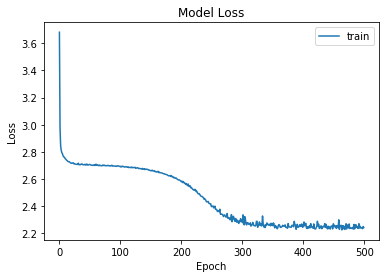

In [19]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])